## Studi Kasus

Tim Data Science perusahaan taksi ingin mengoptimalkan pendapatan pengemudi. Mereka meminta Anda membuat dua model machine learning untuk memprediksi Metode Pembayaran (agar tahu preferensi pelanggan) dan Besaran Tip (agar tahu potensi pendapatan tambahan). Selain itu, manajemen ingin tahu faktor apa yang paling mempengaruhi kedua hal tersebut.

## Soal

### 0. Import Library (0 Poin)

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

### 1. Load & Eksplorasi Data (5 Poin)

1. Muat Dataset taxis dari library Seaborn.

2. Tampilkan 5 baris data pertama.

3. Tampilkan informasi struktur data.

In [ ]:
# Soal 1
df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
# Soal 2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
# Soal 3
print(df.columns)

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')


### 2. Data Cleaning (10 Poin)

1. Dataset ini memiliki missing values (NaN). Cek jumlah data kosong tersebut.

2. Lakukan pembersihan dengan menghapus baris yang memiliki nilai kosong.

3. Hapus kolom yang tidak relevan untuk pemodelan: pickup, dropoff, pickup_zone, dan dropoff_zone.

In [ ]:
# 1. Cek ukuran data awal dan jumlah missing values
ukuran_awal = df.shape[0]
jumlah_missing = df.isna().sum().sum() # Menghitung total cell yang NaN

print(f"Ukuran Data Sebelum Cleaning: {ukuran_awal}")
print(f"Jumlah Missing Values Awal: {jumlah_missing}")

# 2. Lakukan pembersihan dengan menghapus baris yang memiliki nilai kosong
df = df.dropna()

# Cek ukuran setelah menghapus baris kosong
ukuran_akhir = df.shape[0]
print(f"Ukuran Data Setelah Cleaning: {ukuran_akhir}")

# 3. Hapus kolom yang tidak relevan
kolom_dibuang = ['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone']
df = df.drop(columns=kolom_dibuang, errors='ignore')

Ukuran Data Sebelum Cleaning: 6433
Jumlah Missing Values Awal: 186
Ukuran Data Setelah Cleaning: 6341


### 3. Visualisasi Data (10 Poin)

1. <b>Distribusi Target: </b> Histogram untuk kolom tip.

2. <b>Korelasi: </b> Scatter plot atau Bar plot yang menunjukkan hubungan antara distance (jarak) dengan fare (tarif).

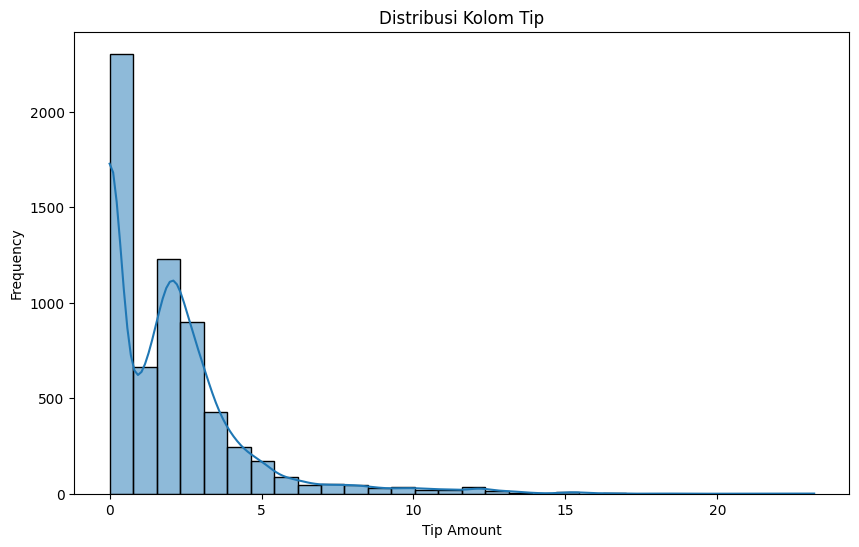

In [ ]:
# Distribusi Nilai tip
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], kde=True, bins=30)
plt.title('Distribusi Kolom Tip')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

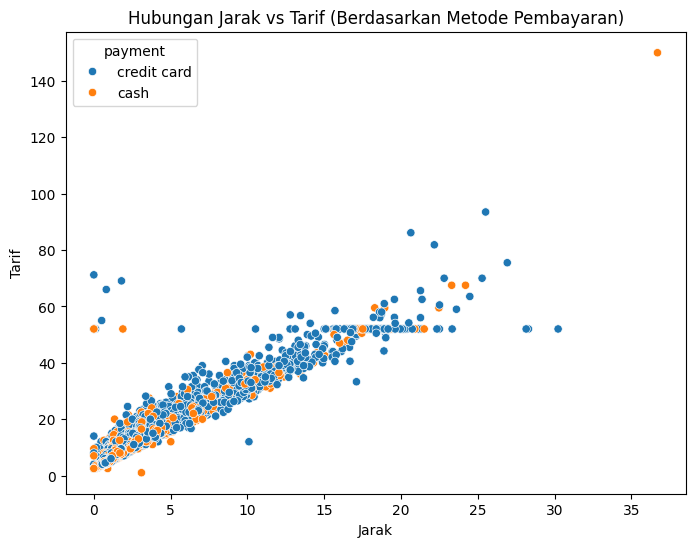

In [ ]:
# Hubungan Jarak vs Tarif
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='distance',
    y='fare',
    hue='payment'  # <--- Tambahkan ini untuk membedakan warna
)

plt.title('Hubungan Jarak vs Tarif (Berdasarkan Metode Pembayaran)')
plt.xlabel('Jarak')
plt.ylabel('Tarif')
plt.show()

### 4. Preprocessing & Encoding (15 Poin)

1. Lakukan Label Encoding pada semua kolom kategorikal (Total 4 Kolom Kategorikal) agar bisa diproses oleh mesin.

2. Tampilkan data hasil encoding.

In [ ]:
# 1. Lakukan Label Encoding pada semua kolom kategorikal
le = LabelEncoder()
df['color'] = le.fit_transform(df['color'])
df['payment'] = le.fit_transform(df['payment'])
df['pickup_borough'] = le.fit_transform(df['pickup_borough'])
df['dropoff_borough'] = le.fit_transform(df['dropoff_borough'])

# 2. Tampilkan data hasil encoding
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough
0,1,1.60,7.0,2.15,0.0,12.95,1,1,2,2
1,1,0.79,5.0,0.00,0.0,9.30,1,0,2,2
2,1,1.37,7.5,2.36,0.0,14.16,1,1,2,2
3,1,7.70,27.0,6.15,0.0,36.95,1,1,2,2
4,3,2.16,9.0,1.10,0.0,13.40,1,1,2,2


### 5. Splitting Data (10 Poin)

1. <b>Skenario Klasifikasi: </b> Fitur (X) = distance, fare, passengers, pickup_borough, total. Target (y) = payment.

2. <b>Skenario Regresi: </b> Fitur (X) = distance, fare, passengers, pickup_borough, tolls. Target (y) = tip.

In [ ]:
# 1. Klasifikasi
X_k = df[['distance', 'fare', 'passengers', 'pickup_borough', 'total']]
y_k = df['payment']

Xk_train, Xk_test, yk_train, yk_test = train_test_split(
    X_k,
    y_k,
    test_size=0.2,
    random_state=42
)
print("Splitting Klasifikasi Selesai.")

# 2. Regresi
X_r = df[['distance', 'fare', 'passengers', 'pickup_borough', 'tolls']]
y_r = df['tip']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_r,
    y_r,
    test_size=0.2,
    random_state=42
)
print("Splitting Regresi Selesai.")

Splitting Klasifikasi Selesai.
Splitting Regresi Selesai.


### 6. Pemodelan (20 Poin)

1. Bangun model <b>Random Forest Classifier</b> untuk memprediksi payment.

2. Bangun model <b>Random Forest Regressor</b> untuk memprediksi tip.

3. Lakukan training (fit) pada kedua model tersebut.

In [ ]:
model_k = RandomForestClassifier(n_estimators=150, random_state=42)
model_r = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)

model_k.fit(Xk_train, yk_train)
model_r.fit(Xr_train, yr_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=42)

### 7. Evaluasi Model (15 Poin)

1. <b>Evaluasi Klasifikasi: </b> Tampilkan Accuracy Score, Classification Report, dan visualisasikan Confusion Matrix.

2. <b>Evaluasi Regresi: </b> Tampilkan nilai RMSE (Root Mean Squared Error) dan $R^2$ Score.

Hasil Klasifikasi: 
Akurasi: 0.8991331757289204
Clasification Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       365
           1       0.93      0.93      0.93       904

    accuracy                           0.90      1269
   macro avg       0.88      0.88      0.88      1269
weighted avg       0.90      0.90      0.90      1269



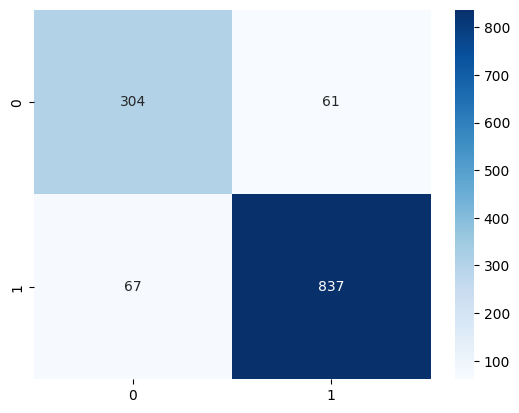

In [ ]:
# Evaluasi Klasifikasi
print("Hasil Klasifikasi: ")
K_predict = model_k.predict(Xk_test)
cm = confusion_matrix(yk_test,K_predict)
print(f"Akurasi: {accuracy_score(yk_test, K_predict)}")
print("Clasification Report: ")
print(classification_report(yk_test, K_predict))
plt.Figure(figsize=(10,6))
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues",)
plt.show()

In [ ]:
# Evaluasi Regresi
print("\nHasil Regresi: ")
R_predict = model_r.predict(Xr_test)
mse = mean_squared_error(yr_test,R_predict)
rmse = np.sqrt(mse)
r2 = r2_score(yr_test,R_predict)

print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"R2 Score : {r2}")


Hasil Regresi: 
MSE : 4.268270680968912
RMSE : 2.065979351534984
R2 Score : 0.19054216847634342


### 8. Analisis Feature Importance (10 Poin)

1. Akses atribut <b>feature_importances_</b> dari kedua model Random Forest yang sudah dibuat.

2. Buatlah visualisasi Bar Plot untuk masing-masing model (satu plot untuk Klasifikasi, satu untuk Regresi) yang mengurutkan fitur dari yang paling berpengaruh hingga yang terendah.

3. Pertanyaan Analisis: Berdasarkan plot tersebut, fitur apakah yang menjadi penentu utama seseorang membayar dengan Credit Card? Dan fitur apa yang paling mempengaruhi besarnya Tip? (Jawab Disini)

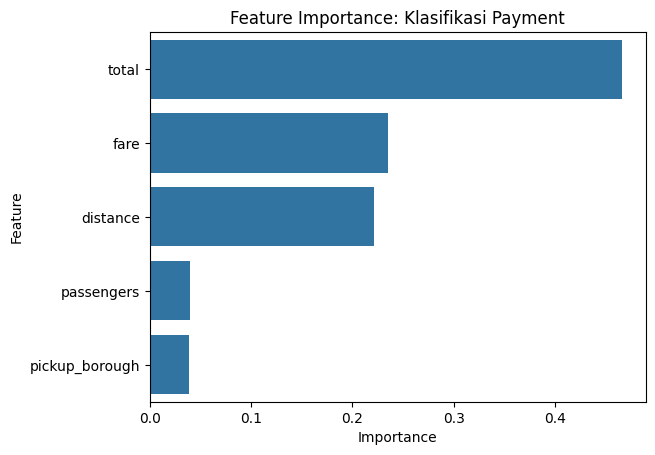

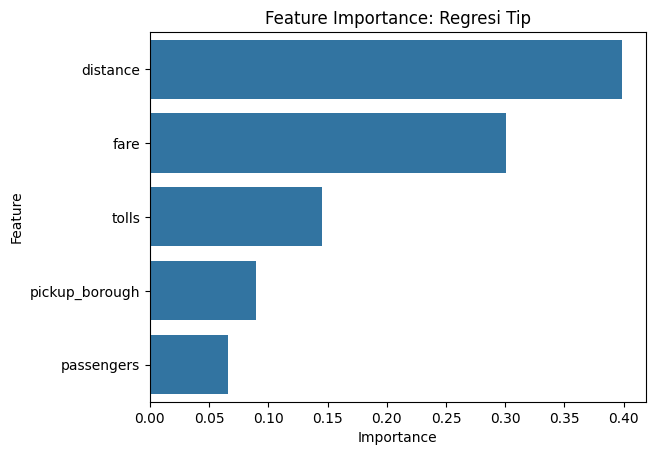

In [ ]:
# Analisis Feature
importance_K = pd.DataFrame({
    "Feature":X_k.columns,
    "Importance": model_k.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_R = pd.DataFrame({
    "Feature":X_r.columns,
    "Importance": model_r.feature_importances_
}).sort_values(by="Importance", ascending=False)


plt.Figure(figsize=(10,6))
sns.barplot(data =importance_K, x= "Importance", y = "Feature")
plt.title("Feature Importance: Klasifikasi Payment")
plt.show()

plt.Figure(figsize=(10,6))
sns.barplot(data =importance_R, x= "Importance", y = "Feature")
plt.title("Feature Importance: Regresi Tip")
plt.show()


### 9. Kesimpulan Bisnis (5 Poin)

Berdasarkan hasil evaluasi dan feature importance, berikan 2 rekomendasi singkat kepada pengemudi taksi untuk meningkatkan peluang mendapatkan tip yang besar.

(Jawaban) :
1. Prioritaskan Penumpang dengan Tujuan Jarak Jauh (Long Distance)

Alasan Data: Pada grafik Regresi Tip, fitur distance (jarak) adalah faktor yang paling dominan (skor ~0.40).

Strategi: Jika memungkinkan, pilihlah pesanan perjalanan yang menempuh jarak jauh (seperti ke bandara atau luar kota). Secara statistik, semakin jauh jarak tempuh, semakin besar nominal tip yang diberikan penumpang.

2. Fokus pada Rute Bernilai Tinggi (Tarif & Tol)

Alasan Data: Fitur fare (tarif) dan total (total biaya) memiliki tingkat kepentingan yang sangat tinggi di kedua model. Fitur tolls (biaya tol) juga muncul sebagai faktor penting ke-3 pada prediksi tip.

Strategi: Perjalanan yang melewati jalan tol atau memiliki estimasi tarif tinggi tidak hanya meningkatkan pendapatan dasar, tetapi juga berkorelasi kuat dengan pemberian tip yang lebih besar. Selain itu, total biaya yang tinggi (total di grafik kedua) sering kali memicu pembayaran non-tunai (kartu), yang memudahkan penumpang memberikan tip dibandingkan pembayaran tunai.